In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth


In [2]:
c1 = Consumer(10)  # Create instance with initial wealth 10
c1.spend(5)
c1.wealth

5

In [3]:
c1.earn(15)
c1.spend(100)

Insufficent funds


In [4]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [5]:
c1.wealth


10

In [6]:
c1.__dict__


{'wealth': 10}

In [7]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

In [30]:
c2 = Consumer(1000)
c1_c2_family = Consumer(0)
c1_c2_family.wealth = c2.wealth  + c1.wealth 
c1_c2_family.wealth

1020

In [31]:
c1.earn(10)
Consumer.earn(c1, 20)
c1.wealth

50

In [24]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

        
    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)
    
    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()
        
    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path    

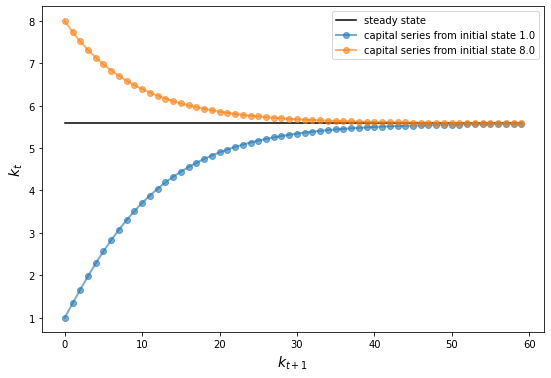

In [27]:
s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$k_{t+1}$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()


In [1]:
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Return equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [2]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [3]:
print("consumer surplus = ", m.consumer_surp())


consumer surplus =  33.0625


In [10]:
q_max

11.5

In [13]:
q_grid

array([ 0.        ,  0.11616162,  0.23232323,  0.34848485,  0.46464646,
        0.58080808,  0.6969697 ,  0.81313131,  0.92929293,  1.04545455,
        1.16161616,  1.27777778,  1.39393939,  1.51010101,  1.62626263,
        1.74242424,  1.85858586,  1.97474747,  2.09090909,  2.20707071,
        2.32323232,  2.43939394,  2.55555556,  2.67171717,  2.78787879,
        2.9040404 ,  3.02020202,  3.13636364,  3.25252525,  3.36868687,
        3.48484848,  3.6010101 ,  3.71717172,  3.83333333,  3.94949495,
        4.06565657,  4.18181818,  4.2979798 ,  4.41414141,  4.53030303,
        4.64646465,  4.76262626,  4.87878788,  4.99494949,  5.11111111,
        5.22727273,  5.34343434,  5.45959596,  5.57575758,  5.69191919,
        5.80808081,  5.92424242,  6.04040404,  6.15656566,  6.27272727,
        6.38888889,  6.50505051,  6.62121212,  6.73737374,  6.85353535,
        6.96969697,  7.08585859,  7.2020202 ,  7.31818182,  7.43434343,
        7.55050505,  7.66666667,  7.78282828,  7.8989899 ,  8.01

In [14]:
pd

array([30.        , 29.76767677, 29.53535354, 29.3030303 , 29.07070707,
       28.83838384, 28.60606061, 28.37373737, 28.14141414, 27.90909091,
       27.67676768, 27.44444444, 27.21212121, 26.97979798, 26.74747475,
       26.51515152, 26.28282828, 26.05050505, 25.81818182, 25.58585859,
       25.35353535, 25.12121212, 24.88888889, 24.65656566, 24.42424242,
       24.19191919, 23.95959596, 23.72727273, 23.49494949, 23.26262626,
       23.03030303, 22.7979798 , 22.56565657, 22.33333333, 22.1010101 ,
       21.86868687, 21.63636364, 21.4040404 , 21.17171717, 20.93939394,
       20.70707071, 20.47474747, 20.24242424, 20.01010101, 19.77777778,
       19.54545455, 19.31313131, 19.08080808, 18.84848485, 18.61616162,
       18.38383838, 18.15151515, 17.91919192, 17.68686869, 17.45454545,
       17.22222222, 16.98989899, 16.75757576, 16.52525253, 16.29292929,
       16.06060606, 15.82828283, 15.5959596 , 15.36363636, 15.13131313,
       14.8989899 , 14.66666667, 14.43434343, 14.2020202 , 13.96

In [15]:
ps

array([ 7.        ,  7.23232323,  7.46464646,  7.6969697 ,  7.92929293,
        8.16161616,  8.39393939,  8.62626263,  8.85858586,  9.09090909,
        9.32323232,  9.55555556,  9.78787879, 10.02020202, 10.25252525,
       10.48484848, 10.71717172, 10.94949495, 11.18181818, 11.41414141,
       11.64646465, 11.87878788, 12.11111111, 12.34343434, 12.57575758,
       12.80808081, 13.04040404, 13.27272727, 13.50505051, 13.73737374,
       13.96969697, 14.2020202 , 14.43434343, 14.66666667, 14.8989899 ,
       15.13131313, 15.36363636, 15.5959596 , 15.82828283, 16.06060606,
       16.29292929, 16.52525253, 16.75757576, 16.98989899, 17.22222222,
       17.45454545, 17.68686869, 17.91919192, 18.15151515, 18.38383838,
       18.61616162, 18.84848485, 19.08080808, 19.31313131, 19.54545455,
       19.77777778, 20.01010101, 20.24242424, 20.47474747, 20.70707071,
       20.93939394, 21.17171717, 21.4040404 , 21.63636364, 21.86868687,
       22.1010101 , 22.33333333, 22.56565657, 22.7979798 , 23.03

In [16]:
psno

array([ 4.        ,  4.23232323,  4.46464646,  4.6969697 ,  4.92929293,
        5.16161616,  5.39393939,  5.62626263,  5.85858586,  6.09090909,
        6.32323232,  6.55555556,  6.78787879,  7.02020202,  7.25252525,
        7.48484848,  7.71717172,  7.94949495,  8.18181818,  8.41414141,
        8.64646465,  8.87878788,  9.11111111,  9.34343434,  9.57575758,
        9.80808081, 10.04040404, 10.27272727, 10.50505051, 10.73737374,
       10.96969697, 11.2020202 , 11.43434343, 11.66666667, 11.8989899 ,
       12.13131313, 12.36363636, 12.5959596 , 12.82828283, 13.06060606,
       13.29292929, 13.52525253, 13.75757576, 13.98989899, 14.22222222,
       14.45454545, 14.68686869, 14.91919192, 15.15151515, 15.38383838,
       15.61616162, 15.84848485, 16.08080808, 16.31313131, 16.54545455,
       16.77777778, 17.01010101, 17.24242424, 17.47474747, 17.70707071,
       17.93939394, 18.17171717, 18.4040404 , 18.63636364, 18.86868687,
       19.1010101 , 19.33333333, 19.56565657, 19.7979798 , 20.03

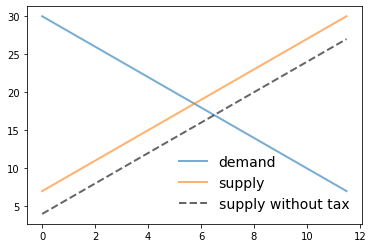

In [29]:
fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.legend(loc='lower right', frameon=False, fontsize=14)

plt.show()

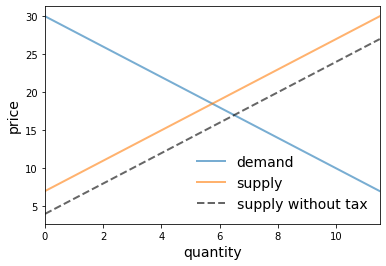

In [8]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [30]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [31]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m) 

1.125

In [32]:
class Chaos:
  """
  Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
  """
  def __init__(self, x0, r):
      """
      Initialize with state x0 and parameter r
      """
      self.x, self.r = x0, r

  def update(self):
      "Apply the map to update state."
      self.x =  self.r * self.x *(1 - self.x)

  def generate_sequence(self, n):
      "Generate and return a sequence of length n."
      path = []
      for i in range(n):
          path.append(self.x)
          self.update()
      return path

In [33]:
ch = Chaos(0.1, 4.0)     # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

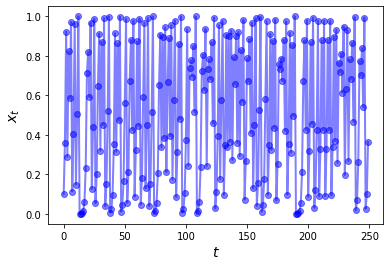

In [34]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

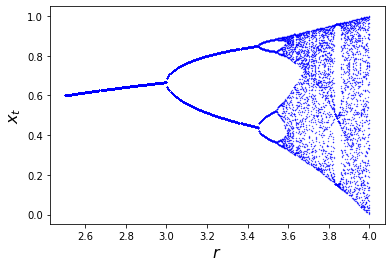

In [35]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel('$r$', fontsize=16)
ax.set_ylabel('$x_t$', fontsize=16)
plt.show()

In [42]:
from random import uniform

samples = [uniform(0, 1) for i in range(25)]
samples
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

[0.22461979540370203,
 0.03642452332394175,
 0.16827983301259186,
 0.7500783360515633,
 0.40920805578947494,
 0.44069775137812695,
 0.7211766066059192,
 0.4194752578973495,
 0.28053752474348037,
 0.19214182856891993,
 0.8933352564260726,
 0.22020194892066391,
 0.8136023965971012,
 0.8297518863482595,
 0.09782975290945095,
 0.5411250638072322,
 0.029756598499229403,
 0.2982832598623697,
 0.8383040168297359,
 0.9875736703345761,
 0.32411920842872655,
 0.45910453989082345,
 0.8403149343305648,
 0.39684921672253415,
 0.6083795584985411]

In [52]:
class ECDF:
    def __init__(self, observations):
        self.observations = observations
        
    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        return counter / len(self.observations)

In [55]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

print(F(0.5))  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.2
0.486


In [59]:
samples

[0.734676566960892,
 0.6128000910459659,
 0.7741608976679821,
 0.6895677822598545,
 0.5640944503428829,
 0.5269467248772436,
 0.3166443274915369,
 0.9284512420074024,
 0.3006199504256257,
 0.8005483622962108]

In [60]:
class Polynomial:

    def __init__(self, coefficients):
        """
        Creates an instance of the Polynomial class representing

            p(x) = a_0 x^0 + ... + a_N x^N,

        where a_i = coefficients[i].
        """
        self.coefficients = coefficients

    def __call__(self, x):
        "Evaluate the polynomial at x."
        y = 0
        for i, a in enumerate(self.coefficients):
            y += a * x**i
        return y

    def differentiate(self):
        "Reset self.coefficients to those of p' instead of p."
        new_coefficients = []
        for i, a in enumerate(self.coefficients):
            new_coefficients.append(i * a)
        # Remove the first element, which is zero
        del new_coefficients[0]
        # And reset coefficients data to new values
        self.coefficients = new_coefficients
        return new_coefficients
    

In [66]:
p1 = Polynomial(4)
print(p1)

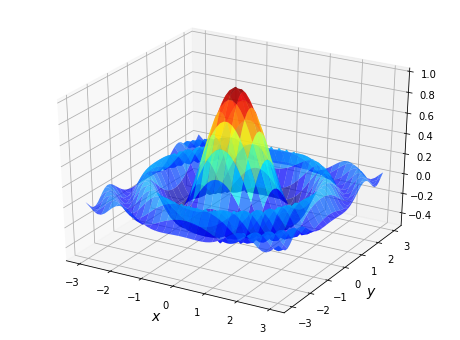

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
plt.show()

In [68]:
grid = np.linspace(-3, 3, 1000)


In [70]:
%%time

m = -np.inf

for x in grid:
    for y in grid:
        z = f(x, y)
        if z > m:
            m = z

CPU times: user 3.94 s, sys: 0 ns, total: 3.94 s
Wall time: 3.96 s


In [71]:
%%time

x, y = np.meshgrid(grid, grid)
np.max(f(x, y))

CPU times: user 43.7 ms, sys: 36.6 ms, total: 80.4 ms
Wall time: 86.8 ms


0.9999819641085747